Import کتابخانه‌های مورد نیاز

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")

بارگذاری و خواندن دیتاست

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['data/data.csv'] = data.target

print(f"تعداد نمونه‌ها: {df.shape[0]}")
print(f"تعداد ویژگی‌ها: {df.shape[1]-1}")
print(f"نام کلاس‌ها: {data.target_names}")
df.head()

تعداد نمونه‌ها: 569
تعداد ویژگی‌ها: 30
نام کلاس‌ها: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,data/data.csv
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


اکتشاف کامل دیتاست (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

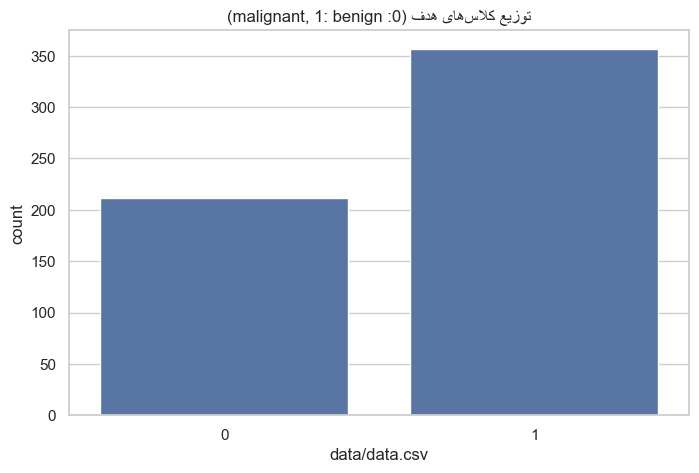

۱۰ ویژگی با بیشترین همبستگی مطلق با هدف:
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: data/data.csv, dtype: float64


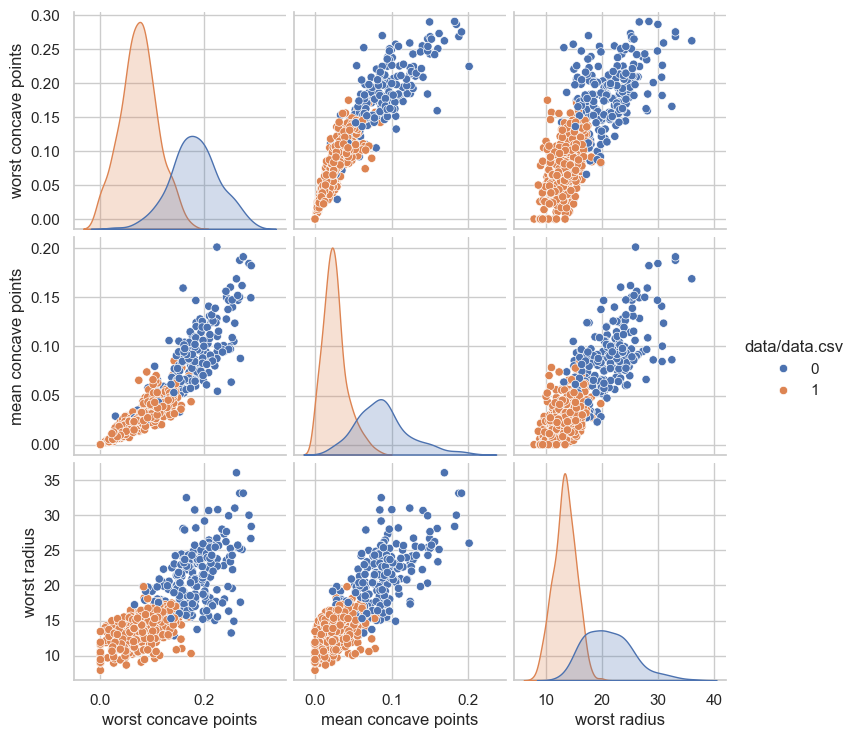

In [3]:
# اطلاعات کلی
df.info()

# آمار توصیفی
df.describe()

# توزیع کلاس‌ها
print("توزیع کلاس‌ها:")
print(df['data/data.csv'].value_counts(normalize=True))

plt.figure(figsize=(8, 5))
sns.countplot(x='data/data.csv', data=df)
plt.title(persian_text('توزیع کلاس‌های هدف (0: malignant, 1: benign)'))
plt.show()

# همبستگی ویژگی‌ها با هدف
correlations = df.corr()['data/data.csv'].sort_values(ascending=False)
print("۱۰ ویژگی با بیشترین همبستگی مطلق با هدف:")
print(correlations.abs().sort_values(ascending=False).head(11)[1:])  # بدون خود target

# نمودار پراکندگی چند ویژگی مهم
important_features = ['worst concave points', 'mean concave points', 'worst radius']
sns.pairplot(df, vars=important_features, hue='data/data.csv', diag_kind='kde')
plt.show()

شناسایی Missing Values

In [4]:
print(f"تعداد مقادیر گمشده: {df.isnull().sum().sum()}")

تعداد مقادیر گمشده: 0


ترسیم نمودارهای مختلف برای درک بهتر

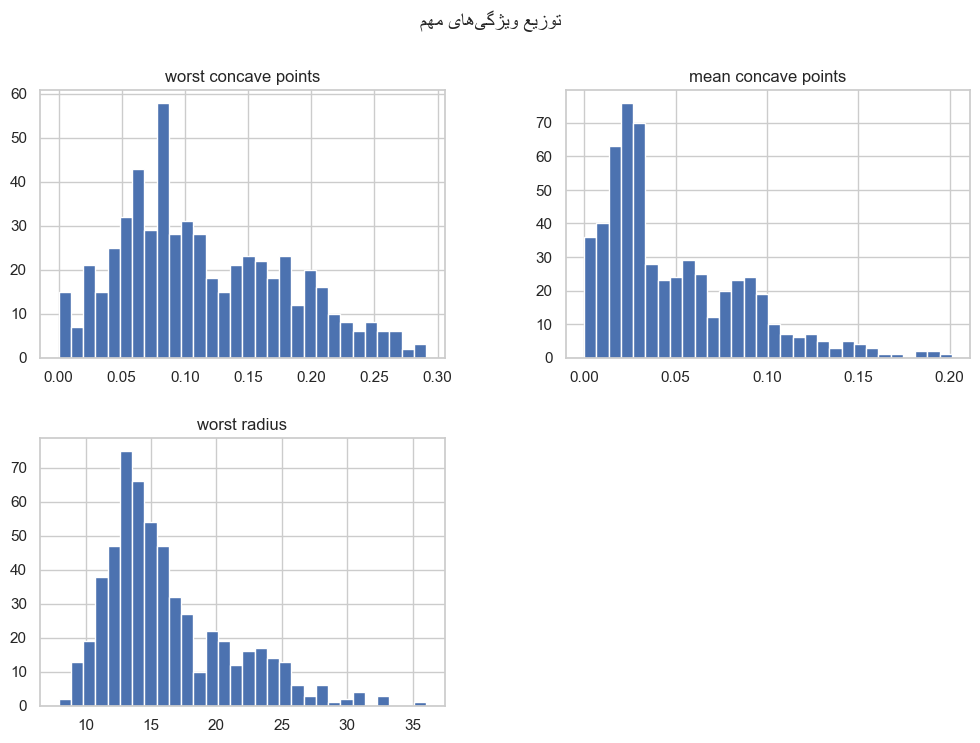

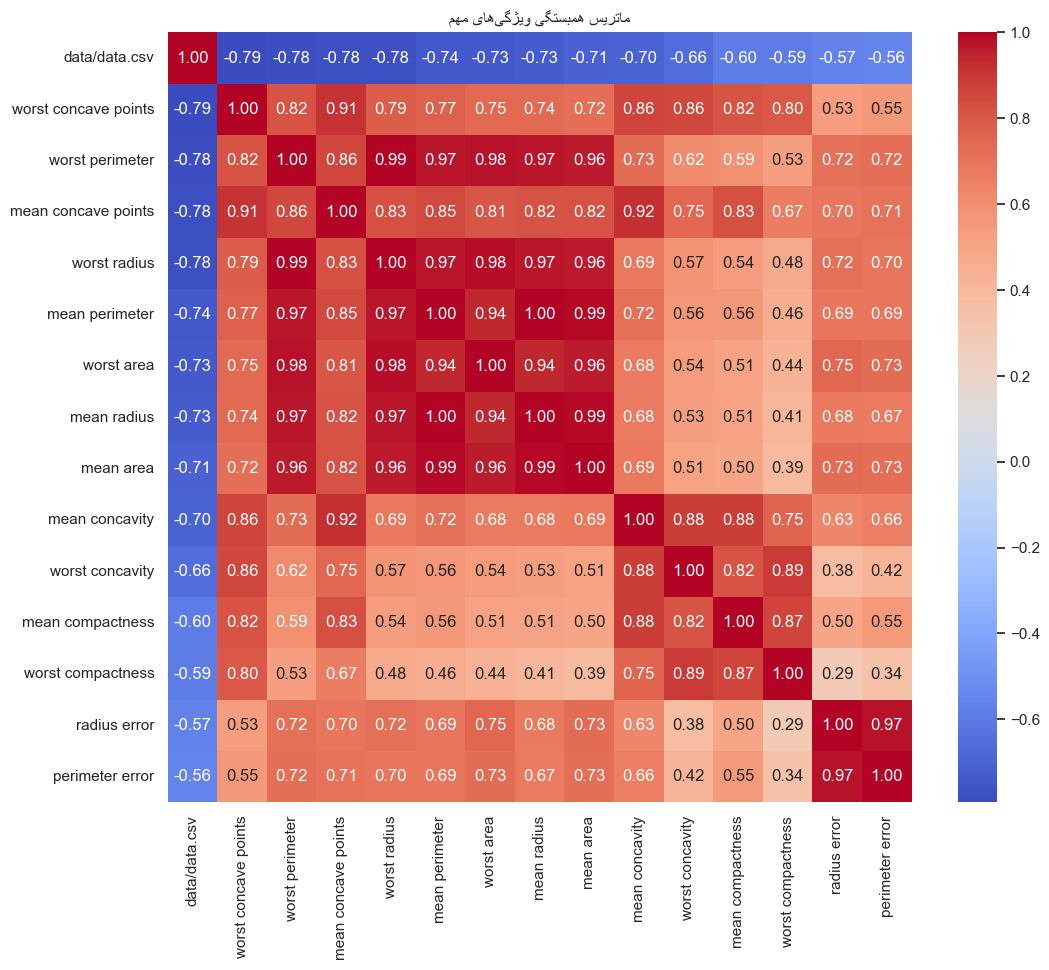

In [5]:
# هیستوگرام چند ویژگی مهم
df[important_features].hist(bins=30, figsize=(12, 8))
plt.suptitle(persian_text('توزیع ویژگی‌های مهم'))
plt.show()

# ماتریس همبستگی ویژگی‌های با همبستگی بالا
high_corr_features = correlations.abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(12, 10))
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(persian_text('ماتریس همبستگی ویژگی‌های مهم'))
plt.show()

پیش‌پردازش و تقسیم داده‌ها

In [6]:
X = df.drop('data/data.csv', axis=1)
y = df['data/data.csv']

# مقیاس‌بندی (ضروری برای SVM و kNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم ثابت برای ارزیابی نهایی
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"اندازه train: {X_train.shape[0]}, test: {X_test.shape[0]}")

اندازه train: 455, test: 114


تابع کمکی برای ارزیابی با حجم‌های مختلف آموزشی

In [7]:
def evaluate_with_different_sizes(model, name):
    train_sizes = np.linspace(0.1, 1.0, 10)
    accuracies = []
    
    for size in train_sizes:
        n_samples = int(size * len(X_train))
        X_sub = X_train[:n_samples]
        y_sub = y_train[:n_samples]
        
        model.fit(X_sub, y_sub)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    
    # plot learning curve
    plt.plot(train_sizes, accuracies, marker='o', label=name)
    
    # بهترین مدل روی کل train
    model.fit(X_train, y_train)
    y_pred_final = model.predict(X_test)
    print(f"\nنتایج نهایی {name} (روی کل داده آموزشی):")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
    print(classification_report(y_test, y_pred_final, target_names=data.target_names))
    
    return model

آموزش و ارزیابی مدل‌ها


نتایج نهایی Logistic Regression (روی کل داده آموزشی):
Accuracy: 0.9825
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


نتایج نهایی Linear SVM (روی کل داده آموزشی):
Accuracy: 0.9737
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


نتایج نهایی RBF SVM (روی کل داده آموزشی):
Accuracy: 0.9825
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.9

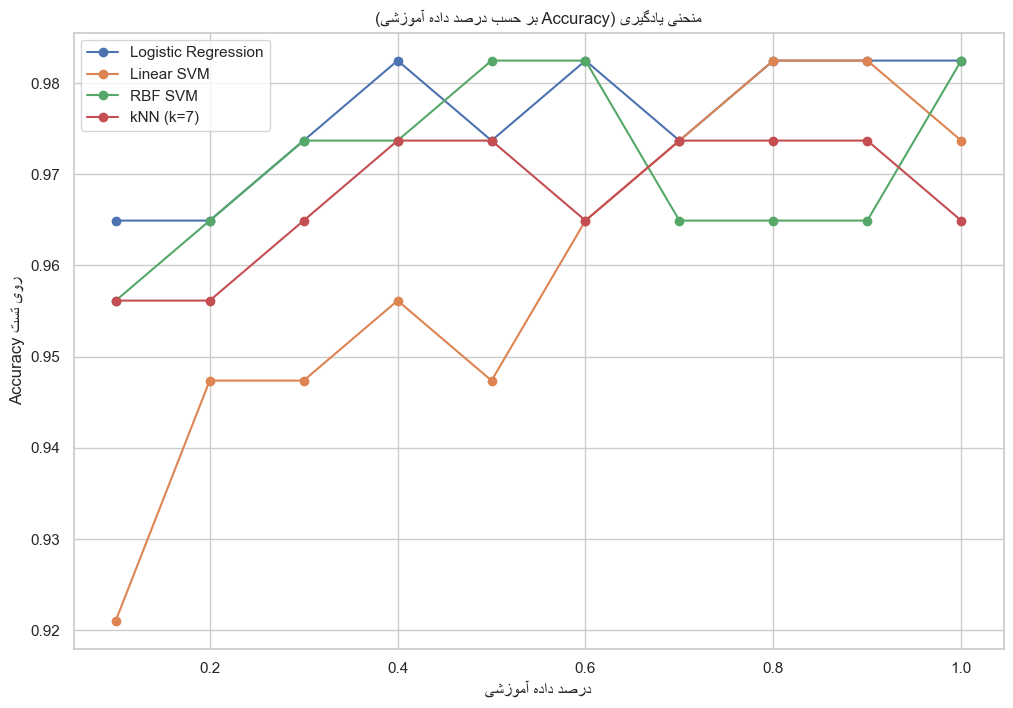

In [8]:
plt.figure(figsize=(12, 8))
plt.title(persian_text('منحنی یادگیری (Accuracy بر حسب درصد داده آموزشی)'))
plt.xlabel(persian_text('درصد داده آموزشی'))
plt.ylabel(persian_text('Accuracy روی تست'))

# ۱. Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
evaluate_with_different_sizes(log_reg, 'Logistic Regression')

# ۲. Linear SVM
linear_svm = SVC(kernel='linear')
evaluate_with_different_sizes(linear_svm, 'Linear SVM')

# ۳. Non-linear SVM (RBF)
rbf_svm = SVC(kernel='rbf', gamma='scale')
evaluate_with_different_sizes(rbf_svm, 'RBF SVM')

# ۴. kNN (با انتخاب بهترین k)
param_grid = {'n_neighbors': range(3, 20)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print(f"بهترین k: {knn_grid.best_params_['n_neighbors']}")
evaluate_with_different_sizes(best_knn, f'kNN (k={knn_grid.best_params_["n_neighbors"]})')

plt.legend()
plt.grid(True)
plt.show()

Confusion Matrix

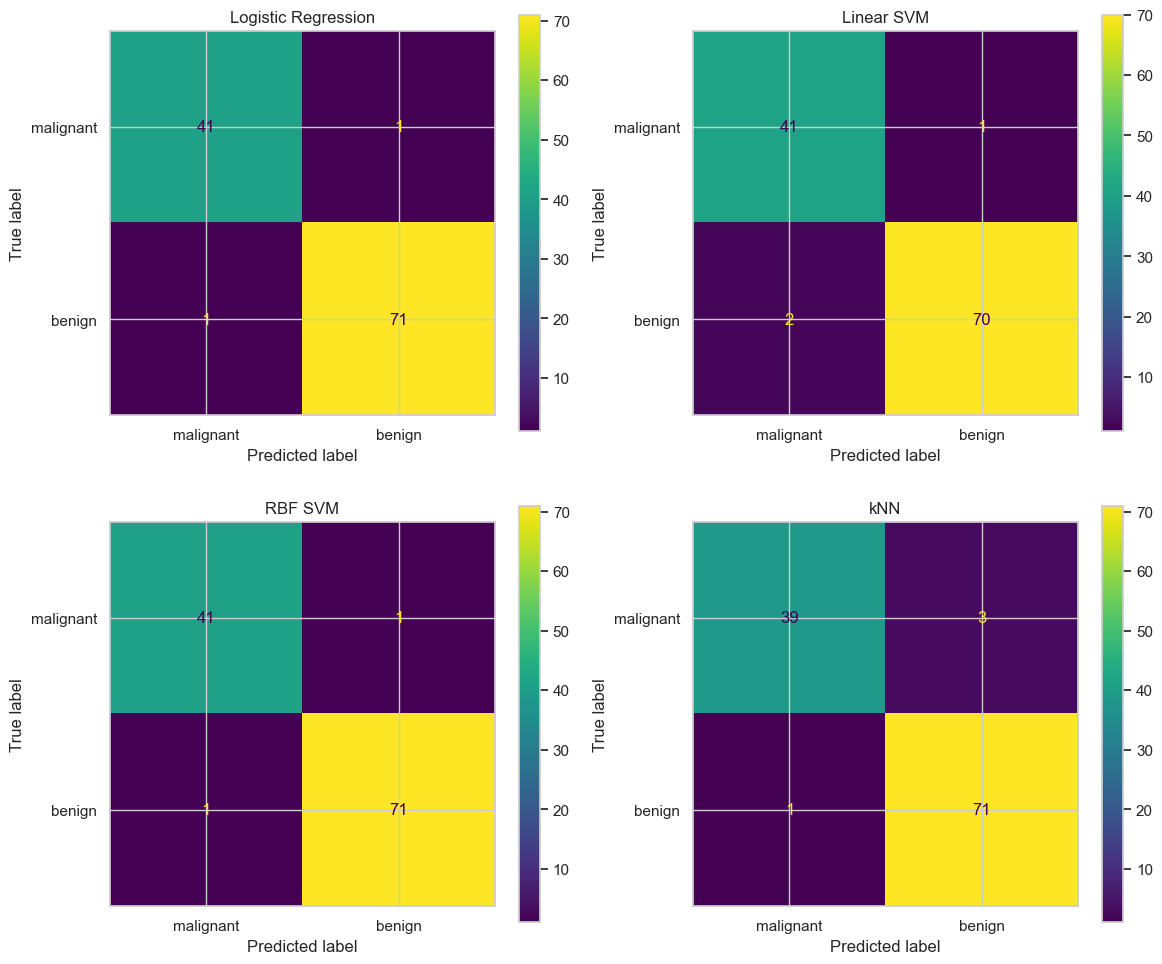

In [9]:
models = {
    'Logistic Regression': log_reg,
    'Linear SVM': linear_svm,
    'RBF SVM': rbf_svm,
    'kNN': best_knn
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=data.target_names, ax=axes[idx])
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()